In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns

In [2]:
credit = pd.read_csv('dataset/BankChurners.csv')
credit.head(5).transpose()


,0,1,2,3,4
CLIENTNUM,768805383,818770008,713982108,769911858,709106358
Attrition_Flag,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer
Customer_Age,45,49,51,40,40
Gender,M,F,M,F,M
Dependent_count,3,5,3,4,3
Education_Level,High School,Graduate,Graduate,High School,Uneducated
Marital_Status,Married,Single,Married,Unknown,Married
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,39,44,36,34,21


Preprocessing

Removing Duplicates

In [3]:
credit.columns = credit.columns.str.lower()

In [4]:
credit.shape

(2998, 23)

In [5]:
credit.clientnum.nunique()

2998

In [6]:
credit.drop_duplicates(inplace=True)

In [7]:
credit.drop(['naive_bayes_classifier','classification'],axis=1,inplace=True)

In [8]:
credit.dtypes

clientnum                     int64
attrition_flag               object
customer_age                  int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
income_category              object
card_category                object
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
contacts_count_12_mon         int64
credit_limit                float64
total_revolving_bal           int64
avg_open_to_buy             float64
total_amt_chng_q4_q1        float64
total_trans_amt               int64
total_trans_ct                int64
total_ct_chng_q4_q1         float64
avg_utilization_ratio       float64
dtype: object

In [9]:
credit.isnull().sum()

clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

Data Transformation

In [10]:
bins=[20,30,40,50,60,70,80]
labels=['20s','30s','40s','50s','60s','70s','80s']

credit['customer_age_bins'] = pd.cut(
    credit['customer_age'],
    bins,
    labels,
    include_lowest=True
)

credit.head(5).transpose()

,0,1,2,3,4
clientnum,768805383,818770008,713982108,769911858,709106358
attrition_flag,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer
customer_age,45,49,51,40,40
gender,M,F,M,F,M
dependent_count,3,5,3,4,3
education_level,High School,Graduate,Graduate,High School,Uneducated
marital_status,Married,Single,Married,Unknown,Married
income_category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K
card_category,Blue,Blue,Blue,Blue,Blue
months_on_book,39,44,36,34,21


In [11]:
credit.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'customer_age_bins'],
      dtype='object')

In [12]:
num_df = credit[['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'customer_age_bins']]._get_numeric_data()


In [14]:
num_df.head(5)

,clientnum,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


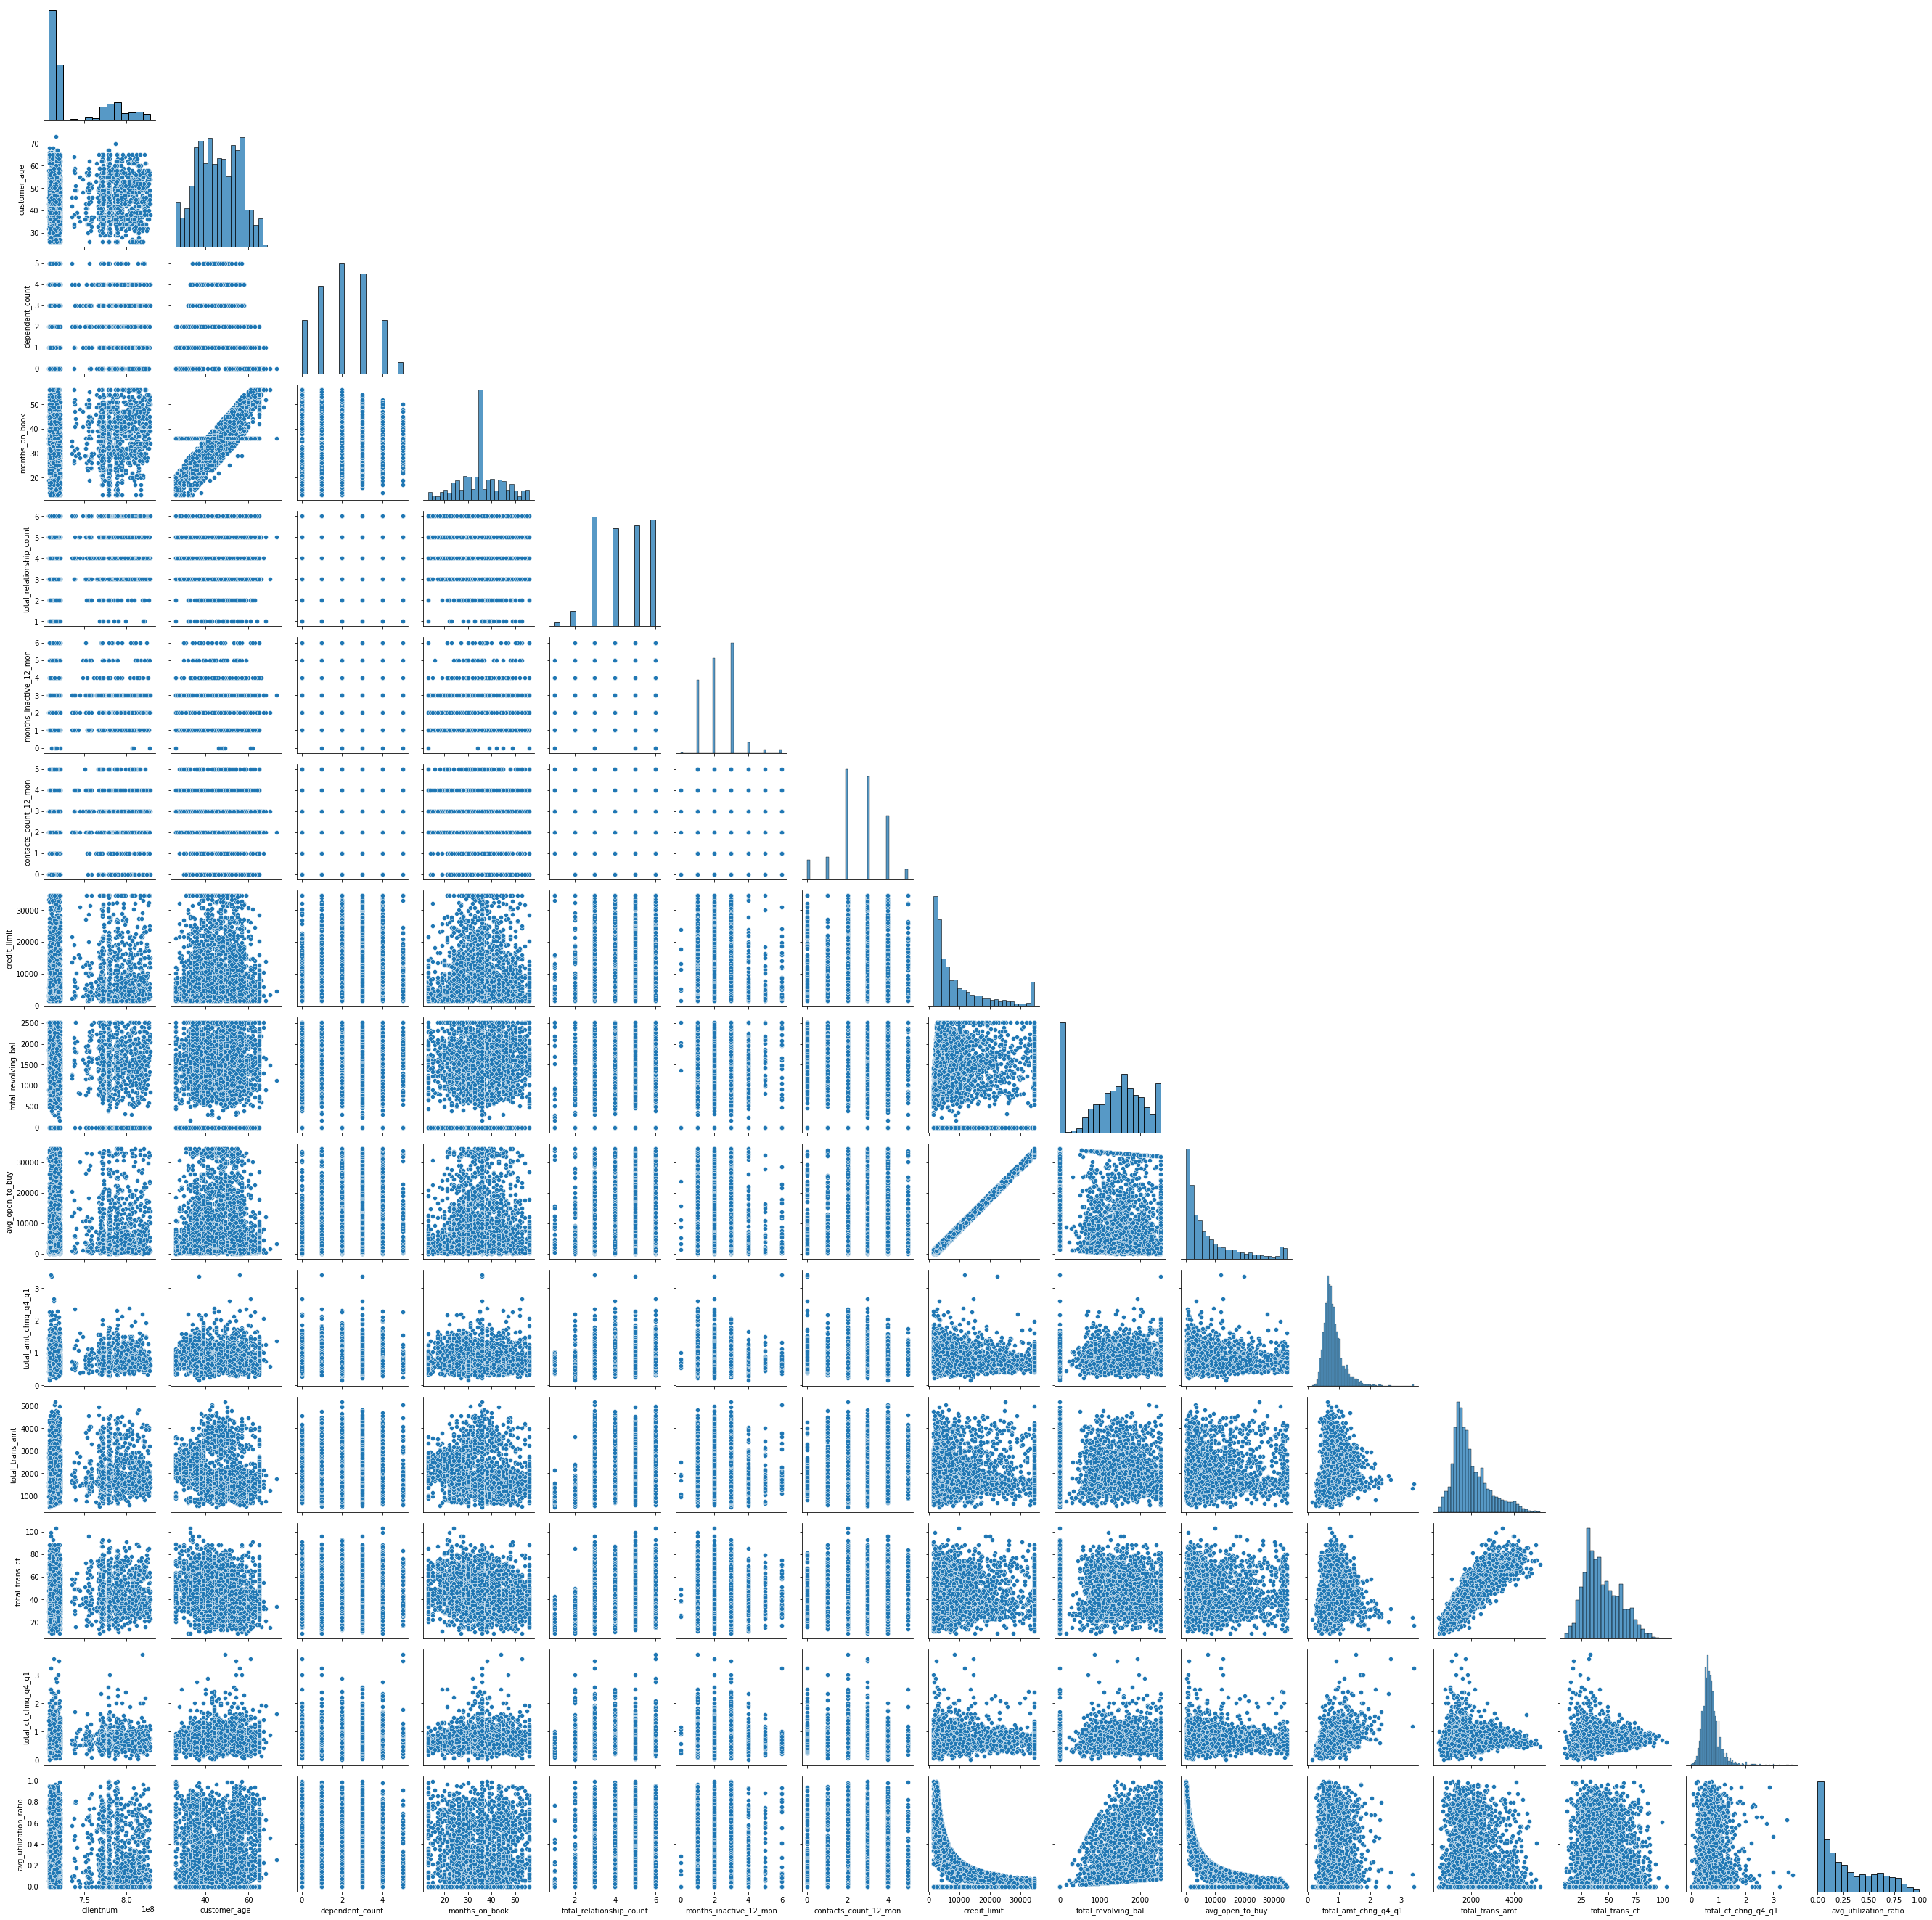

In [15]:
pairgrid = sns.PairGrid(data=num_df,diag_sharey=False,corner=True)
pairgrid.map_lower(sns.scatterplot)
pairgrid.map_diag(sns.histplot)

plt.savefig('result/Credit_pairgrid.webp',bbox_inches='tight')

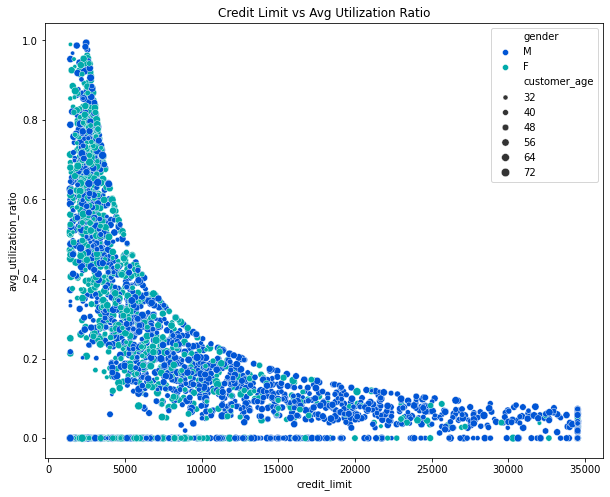

In [16]:
plt.figure(figsize=(10,8))
plt.title('Credit Limit vs Avg Utilization Ratio')

sns.scatterplot(data=credit,x='credit_limit',y='avg_utilization_ratio',hue='gender',palette='winter',size='customer_age')

plt.savefig('result/credit_credit_limit_vs_age ratio.webp',bbox_inches='tight')

Investigate Subgroups


In [17]:
bins = [credit['total_trans_amt'].min(),1000,credit['total_trans_amt'].max()]
labels = ['Group 1', 'Group 2']

credits = credit.copy()



In [18]:
credits['total_trans_amt_grp'] = pd.cut(credits['total_trans_amt'],bins=bins,labels=labels,include_lowest=True)


In [23]:
credits.shape

(2998, 23)

In [22]:
credits.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'customer_age_bins', 'total_trans_amt_grp'],
      dtype='object')

In [25]:
credits = credits.groupby(['total_trans_amt_grp','attrition_flag']).agg({
    'clientnum':'nunique', 'customer_age':'median',
       'dependent_count':'median', 'months_on_book':'median',
       'total_relationship_count':'median','months_inactive_12_mon':'median',
       'contacts_count_12_mon':'median', 'credit_limit':'median', 'total_revolving_bal':'median',
       'avg_open_to_buy':'median', 'total_amt_chng_q4_q1':'median', 'total_trans_amt':'median',
       'total_trans_ct':'median', 'total_ct_chng_q4_q1':'median', 'avg_utilization_ratio':'median'
})

In [26]:
credits

clientnum  customer_age  \
total_trans_amt_grp attrition_flag                               
Group 1             Attrited Customer        142          49.0   
                    Existing Customer         19          44.0   
Group 2             Attrited Customer         82          48.0   
                    Existing Customer       2755          46.0   

                                       dependent_count  months_on_book  \
total_trans_amt_grp attrition_flag                                       
Group 1             Attrited Customer              2.0            36.0   
                    Existing Customer              2.0            36.0   
Group 2             Attrited Customer              2.0            36.0   
                    Existing Customer              2.0            36.0   

                                       total_relationship_count  \
total_trans_amt_grp attrition_flag                                
Group 1             Attrited Customer                       3.0   
                    Existing Customer                       5.0   
Group 2             Attrited Customer                       3.0   
                    Existing Customer                       5.0   

                                       months_inactive_12_mon  \
total_trans_amt_grp attrition_flag                              
Group 1             Attrited Customer                     3.0   
                    Existing Customer                     2.0   
Group 2             Attrited Customer                     3.0   
                    Existing Customer                     2.0   

                                       contacts_count_12_mon  credit_limit  \
total_trans_amt_grp attrition_flag                                           
Group 1             Attrited Customer                    3.0        4740.5   
                    Existing Customer                    2.0        6884.0   
Group 2             Attrited Customer                    3.0        7618.0   
                    Existing Customer                    3.0        5550.0   

                                       total_revolving_bal  avg_open_to_buy  \
total_trans_amt_grp attrition_flag                                            
Group 1             Attrited Customer                  0.0           3854.0   
                    Existing Customer               1330.0           5653.0   
Group 2             Attrited Customer                  0.0           6410.0   
                    Existing Customer               1475.0           4237.0   

                                       total_amt_chng_q4_q1  total_trans_amt  \
total_trans_amt_grp attrition_flag                                             
Group 1             Attrited Customer                 0.725            810.0   
                    Existing Customer                 0.781            949.0   
Group 2             Attrited Customer                 0.770           1353.0   
                    Existing Customer                 0.761           1805.0   

                                       total_trans_ct  total_ct_chng_q4_q1  \
total_trans_amt_grp attrition_flag                                           
Group 1             Attrited Customer            20.0               0.4645   
                    Existing Customer            24.0               0.9090   
Group 2             Attrited Customer            33.0               0.4600   
                    Existing Customer            43.0               0.6820   

                                       avg_utilization_ratio  
total_trans_amt_grp attrition_flag                            
Group 1             Attrited Customer                  0.000  
                    Existing Customer                  0.152  
Group 2             Attrited Customer                  0.000  
                    Existing Customer                  0.210

<Axes: title={'center': 'Group 1 (Low Spender)'}>

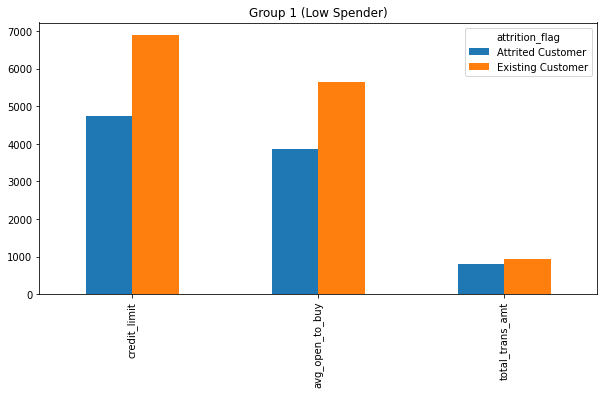

In [27]:
credits.transpose()['Group 1'].loc[
    ['credit_limit','avg_open_to_buy','total_trans_amt']
].plot.bar(
    figsize=(10,5),
    subplots=False,
    legend=True,
    sharey=True,
    layout=(1,2),
    title='Group 1 (Low Spender)'
)

<Axes: title={'center': 'Group 1 (High Spender)'}>

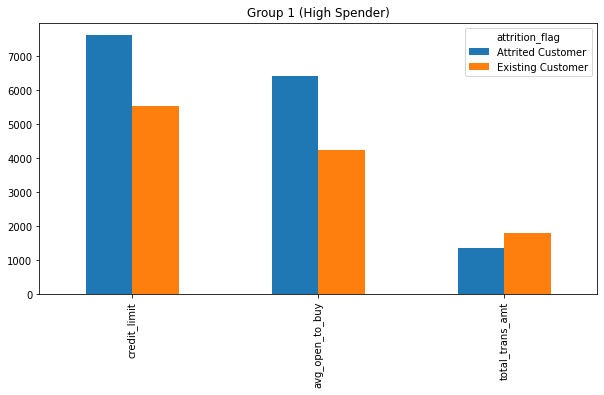

In [28]:
credits.transpose()['Group 2'].loc[
    ['credit_limit','avg_open_to_buy','total_trans_amt']
].plot.bar(
    figsize=(10,5),
    subplots=False,
    legend=True,
    sharey=True,
    layout=(1,2),
    title='Group 1 (High Spender)'
)

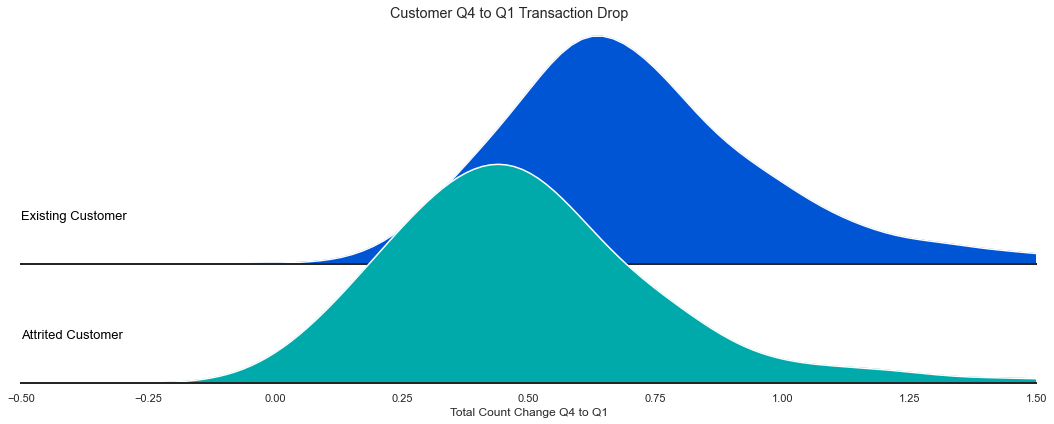

In [36]:
palette = sns.color_palette('winter', 2)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
           ha='left', va='center', transform=ax.transAxes)

sns.set_theme(
    style='white',
    rc={'axes.facecolor': (0, 0, 0, 0), 'axes.linewidth':2}
)

fg = sns.FacetGrid(
    credit,
    palette=palette,
    hue='attrition_flag',
    row='attrition_flag',
    aspect=5,
    height=3
)

fg.map_dataframe(
    sns.kdeplot,
    x='total_ct_chng_q4_q1',
    fill=True,
    alpha=1
)

fg.map_dataframe(
    sns.kdeplot,
    x='total_ct_chng_q4_q1',
    color='white'
)

fg.map(label, 'attrition_flag')
fg.fig.subplots_adjust(hspace=-.5)
fg.set_titles('')
fg.set(yticks=[], ylabel='', xlabel='Total Count Change Q4 to Q1')
fg.despine(left=True)

plt.suptitle('Customer Q4 to Q1 Transaction Drop', y=0.98)
plt.xlim(-0.5,1.5)
plt.savefig('result/density_curves.webp',bbox_inches='tight')

Text(0, 0.5, 'Count')

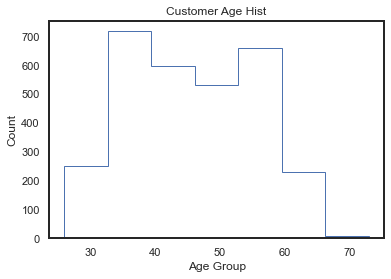

In [38]:
plt.hist(credit['customer_age'],bins=7,histtype='step')
plt.title('Customer Age Hist')
plt.xlabel('Age Group')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

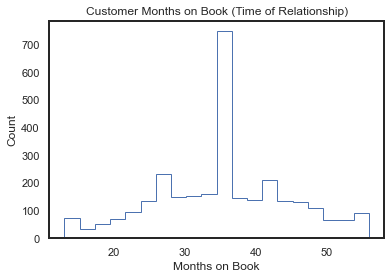

In [43]:
plt.hist(credit['months_on_book'],bins=20,histtype='step')
plt.title('Customer Months on Book (Time of Relationship)')

plt.xlabel('Months on Book')
plt.ylabel('Count')



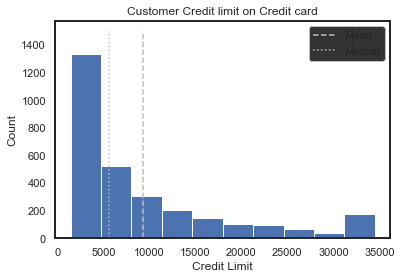

In [46]:
plt.hist(credit['credit_limit'])

plt.vlines(x=credit['credit_limit'].mean(),ymin=0,ymax=1500,colors='0.75',linestyles='dashed',label='Mean')

plt.vlines(x=credit['credit_limit'].median(),ymin=0,ymax=1500,colors='0.75',linestyles='dotted',label='Median')

plt.title('Customer Credit limit on Credit card')

plt.xlabel('Credit Limit')

plt.ylabel('Count')

plt.legend()

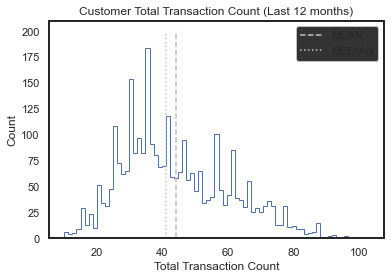

In [48]:
plt.hist(
    credit['total_trans_ct'],
    bins=75,
    histtype='step'
)

plt.vlines(
    x=credit['total_trans_ct'].mean(),
    ymin=0, ymax=200, colors='0.75',
    linestyles='dashed', label='MEAN'
)

plt.vlines(
    x=credit['total_trans_ct'].median(),
    ymin=0, ymax=200, colors='0.75',
    linestyles='dotted', label='MEDIAN'
)

plt.title('Customer Total Transaction Count (Last 12 months)')
plt.xlabel('Total Transaction Count')
plt.ylabel('Count')
plt.legend()

Normalization

In [49]:
def normalize(column):
    upper=column.max()
    lower=column.min()
    norm=(column-lower)/(upper-lower)
    return norm


In [50]:
credit_norm = normalize(credit['credit_limit'])

In [51]:
credit_norm

0       0.340190
1       0.206112
2       0.059850
3       0.056676
4       0.099091
          ...   
2993    0.409965
2994    0.268873
2995    0.265668
2996    0.320811
2997    0.746294
Name: credit_limit, Length: 2998, dtype: float64

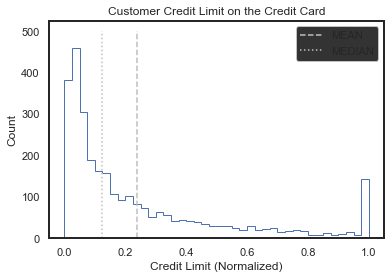

In [52]:
plt.hist(
    x=credit_norm,
    bins=40,
    histtype='step'
)

plt.vlines(
    x=credit_norm.mean(),
    ymin=0, ymax=500, colors='0.75',
    linestyles='dashed', label='MEAN'
)

plt.vlines(
    x=credit_norm.median(),
    ymin=0, ymax=500, colors='0.75',
    linestyles='dotted', label='MEDIAN'
)

plt.title('Customer Credit Limit on the Credit Card')
plt.xlabel('Credit Limit (Normalized)')
plt.ylabel('Count')
plt.legend()

In [54]:
log_credit = np.log(credit['credit_limit'])


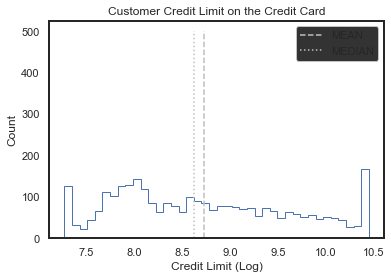

In [55]:
plt.hist(
    x=log_credit,
    bins=40,
    histtype='step'
)

plt.vlines(
    x=log_credit.mean(),
    ymin=0, ymax=500, colors='0.75',
    linestyles='dashed', label='MEAN'
)

plt.vlines(
    x=log_credit.median(),
    ymin=0, ymax=500, colors='0.75',
    linestyles='dotted', label='MEDIAN'
)

plt.title('Customer Credit Limit on the Credit Card')
plt.xlabel('Credit Limit (Log)')
plt.ylabel('Count')
plt.legend()

<Axes: xlabel='credit_limit', ylabel='Count'>

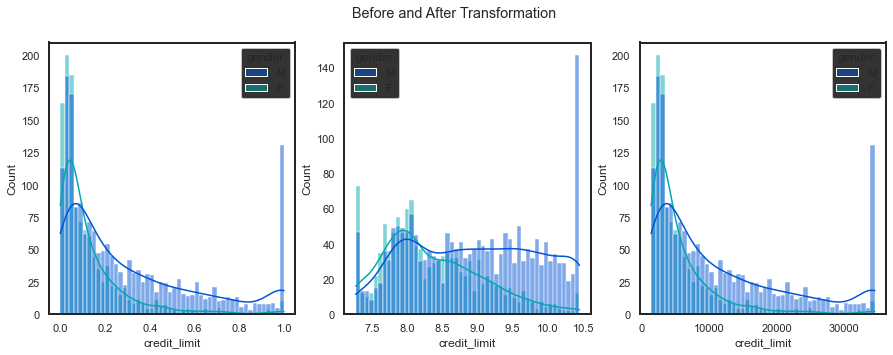

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Before and After Transformation')


sns.histplot(
    x=credit_norm,
    bins=50,
    hue=credit['gender'],
    palette='winter',
    kde=True,
    ax=axes[0]
)

sns.histplot(
    x=log_credit,
    bins=50,
    hue=credit['gender'],
    palette='winter',
    kde=True,
    ax=axes[1]
)

sns.histplot(
    x=credit['credit_limit'],
    bins=50,
    hue=credit['gender'],
    palette='winter',
    kde=True,
    ax=axes[2]
)

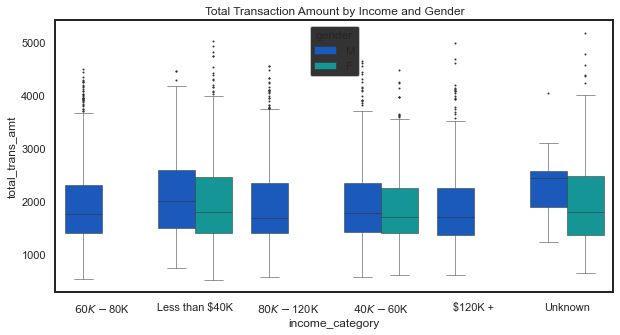

In [60]:
plt.figure(figsize=(10, 5))
plt.title('Total Transaction Amount by Income and Gender')
  
plot = sns.boxplot(
    data=credit,
    y='total_trans_amt',
    x='income_category',
    hue='gender',
    palette='winter',
    orient='v',
    linewidth=0.5,
    fliersize=1
)